# Assignment 1

### Group 11  
Michael Hüppe, Leon Korkmaz

## Task 2: Computing surround-center contrasts using integral images (programming)

In [1]:
import numpy as np
from skimage import io, color
from skimage.transform import integral_image
import matplotlib.pyplot as plt

In [2]:
image = io.imread('visual_attention_ds.png') 
gray_image = color.rgb2gray(color.rgba2rgb(image))
integral_img = integral_image(gray_image)

In [3]:
def compute_contrast_map(center_size, surround_size):

    # Initialize the contrast array
    contrast = np.zeros_like(gray_image)

    # Compute half sizes
    half_center = center_size // 2
    half_surround = surround_size // 2

    # Calculate contrast values for each valid pixel
    for i in range(half_surround, gray_image.shape[0] - half_surround):
        for j in range(half_surround, gray_image.shape[1] - half_surround):
            
            # Define center coordinates
            top_left_center = (i - half_center, j - half_center)
            bottom_right_center = (i + half_center, j + half_center)

            # Define surround window coordinates
            top_left_surround = (i - half_surround, j - half_surround)
            bottom_right_surround = (i + half_surround, j + half_surround)

            # Check if coordinates are within image bounds	
            if (bottom_right_center[0] + 1 < integral_img.shape[0] and
                bottom_right_center[1] + 1 < integral_img.shape[1] and
                bottom_right_surround[0] + 1 < integral_img.shape[0] and
                bottom_right_surround[1] + 1 < integral_img.shape[1]):
                
                # Calculate center sum
                c = (
                    integral_img[bottom_right_center[0] + 1, bottom_right_center[1] + 1]
                    - integral_img[top_left_center[0], bottom_right_center[1] + 1]
                    - integral_img[bottom_right_center[0] + 1, top_left_center[1]]
                    + integral_img[top_left_center[0], top_left_center[1]]
                )

                # Calculate surround sum
                s = (
                    integral_img[bottom_right_surround[0] + 1, bottom_right_surround[1] + 1]
                    - integral_img[top_left_surround[0], bottom_right_surround[1] + 1]
                    - integral_img[bottom_right_surround[0] + 1, top_left_surround[1]]
                    + integral_img[top_left_surround[0], top_left_surround[1]]
                )

                # Contrast value = s - c 
                contrast[i, j] = s - c

    # Crop to remove invalid border pixels
    contrast = contrast[half_surround:-half_surround, half_surround:-half_surround]

    # Display the contrast image
    plt.imshow(contrast, cmap='gray')
    plt.title(f"Contrast Map with {center_size}x{center_size} Center Size and {surround_size}x{surround_size} Surround Size")
    plt.axis('off') 
    plt.show()


### 11x11 center and 21x21 surround size

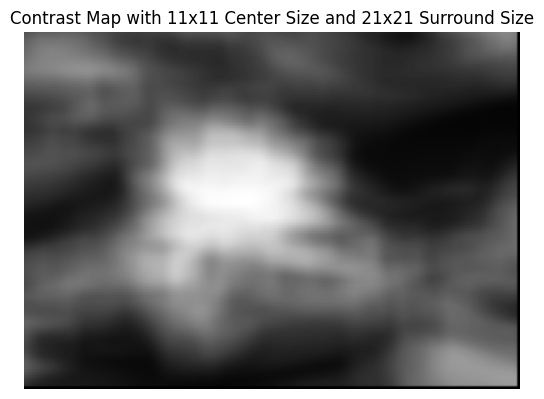

In [4]:
compute_contrast_map(center_size=11, surround_size=21)

### 3x3 center and 7x7 surround size
The contrast map with smaller center and surround size shows finer details and highlights local variations in the image, resulting in a more textured contrast representation.


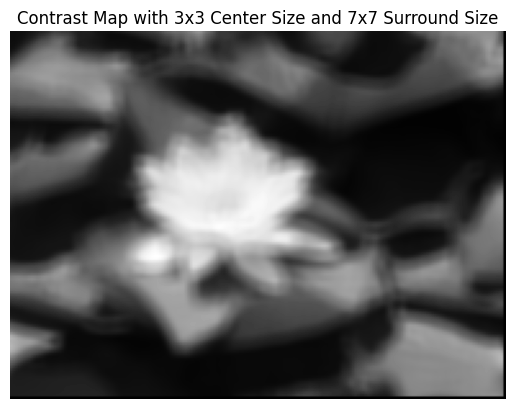

In [5]:
compute_contrast_map(center_size=3, surround_size=7)

### 31x31 center and 51x51 surround size
The contrast map with larger center and surround size smoothes out local variations, resulting in a more blurred contrast representation.

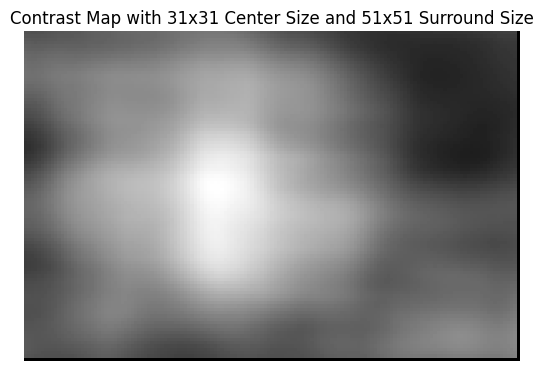

In [6]:
compute_contrast_map(center_size=31, surround_size=51)